In [18]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from kneed import KneeLocator

In [13]:
#import data
owid = pd.read_csv("owid-covid-data.csv")

In [40]:
owid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [127]:
#Query functions exists already
owid2 = owid.query("new_cases >= 10 and total_cases >= 90")
owid2[['new_cases', 'total_cases']]

,new_cases,total_cases
32,11.0,91.0
33,15.0,106.0
36,52.0,166.0
37,26.0,192.0
38,43.0,235.0
...,...,...
173709,115.0,246042.0
173710,140.0,246182.0
173711,104.0,246286.0
173712,128.0,246414.0


In [48]:
owid_small = owid[['new_cases_smoothed', 'total_deaths']]
owid_small = owid_small.dropna()
owid_small

,new_cases_smoothed,total_deaths
32,9.571,2.0
33,11.714,2.0
34,11.429,4.0
35,10.571,4.0
36,17.714,4.0
...,...,...
173709,193.857,5439.0
173710,174.857,5440.0
173711,156.000,5444.0
173712,109.857,5444.0


In [128]:
def kmeans_clustering(df, col1, col2, elbow_point = None):
    if elbow_point is None:
        #Finding k through elbow point method
        sse = []
        k_rng = range(1,11)
        for k in k_rng:
            km = KMeans(n_clusters = k)
            km.fit(df[[col1, col2]])
            sse.append(km.inertia_) #array of sum of squares error

        #KneeLocator function allows to find elbow point without graphing
        elbow_point = KneeLocator(k_rng, sse, curve='convex', direction='decreasing').knee
        #plt.xlabel('K')
        #plt.ylabel('Sum of squared error')
        #plt.plot(k_rng, sse)
    
    #preprocessing using minmax scaler, so that our values are scaled properly and our clusters don't overlap much
    scaler = MinMaxScaler()
    
    scaler.fit(df[[col1]])
    df[col1] = scaler.transform(df[[col1]])
    
    scaler.fit(df[[col2]])
    df[col2] = scaler.transform(df[[col2]])
    
    #once elbow point is located and values are scaled, we can perform k-means clustering
    km = KMeans(n_clusters=elbow_point)
    y_pred = km.fit_predict(df[[col1, col2]])
    df['cluster'] = y_pred
    return (df, km.cluster_centers_, elbow_point)
    
    
    

In [129]:
owid_small_clusters = kmeans_clustering(owid_small, 'new_cases_smoothed', 'total_deaths')

In [130]:
df = owid_small_clusters[0]
cluster_centers = owid_small_clusters[1]
elbow_point = owid_small_clusters[2]
print(elbow_point)

3


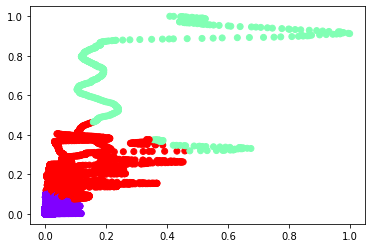

In [131]:
plt.scatter(df['new_cases_smoothed'], df['total_deaths'], c=df['cluster'], cmap='rainbow')

In [132]:
col1 = 'new_cases'
col2 = 'new_deaths'
owid_small_two = owid[[col1, col2]]
owid_small_two = owid_small_two.dropna()

owid_c2 = kmeans_clustering(owid_small_two, col1, col2)
df = owid_c2[0]
cluster_centers = owid_c2[1]
elbow_point = owid_c2[2]
print(elbow_point)

3


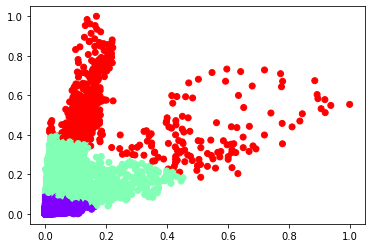

In [133]:
plt.scatter(df[col1], df[col2], c=df['cluster'], cmap='rainbow')